In [378]:
import pandas as pd

data = pd.read_csv("./data.csv")

## Hotel Review Data Info

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.3+ KB


In [380]:
data.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [381]:
data.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

## Data Pre-Processing 

remove unnecessary words from review columns

In [382]:
def remove_phrases(text):
    # Remove "Read more" and "Read less" phrases
    return str(text).replace('Read more', '').replace('Read less', '').replace("\n", '')

data['Review'] = data['Review'].apply(remove_phrases)


remove null value records from data

In [383]:
df = data.dropna()

In [384]:
# formate date
df['date'] = pd.to_datetime(df['date'])

C:\Users\JILL\AppData\Local\Temp\ipykernel_3212\4096787722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [385]:
df.describe()

,date
count,1711
mean,2019-02-14 10:09:19.672706048
min,2018-08-02 00:00:00
25%,2018-10-26 00:00:00
50%,2019-02-16 00:00:00
75%,2019-06-11 12:00:00
max,2019-08-20 00:00:00


In [386]:
df.head()

,Review,date,Location
0,I was very impressed with the resort. Great st...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
10,Very clean and friendly and I love the locatio...,2019-08-19,California


##  Sentiment Analysis
Predicting whether a review is positive or negative using the Natural Language Toolkit (NLTK) library.

In [387]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [388]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

df['Review'] = df['Review'].apply(preprocess_text)


C:\Users\JILL\AppData\Local\Temp\ipykernel_3212\3247786412.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
sia = SentimentIntensityAnalyzer()
positive_threshold = 0.2

df['CompoundScore'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['Sentiment'] = df['CompoundScore'].apply(lambda x: 1 if x >= positive_threshold else 0)

# Group by 'Location' and calculate the total and positive review count
location_review_counts = df.groupby('Location')['Sentiment'].agg(['count', 'sum']).reset_index()

# percentage of positive reviews
location_review_counts['PositivePercentage'] = (location_review_counts['sum'] / location_review_counts['count']) * 100
# print(location_review_counts)

C:\Users\JILL\AppData\Local\Temp\ipykernel_3212\1756568734.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JILL\AppData\Local\Temp\ipykernel_3212\1756568734.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [390]:
df.head()

,Review,date,Location,CompoundScore,Sentiment
0,impress resort great staff main resort pool ba...,2019-08-20,Sebastian,0.9300,1
1,room nice outsid need work also free breakfast...,2019-08-20,Los Angeles,0.8779,1
2,great locat stay hotel last three trip new york,2019-08-20,Georgia,0.6249,1
4,great locat room larg spaciou park easi apprec...,2019-08-19,Palm Harbor,0.6249,1
10,clean friendli love locat restaur insid excel ...,2019-08-19,California,0.8720,1


## Exploratory Data Analysis (EDA):

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [392]:
# Sentiment distribution with plotly
fig = px.histogram(df, x='Sentiment', title='Sentiment distribution', color='Sentiment')
fig.update_layout(xaxis_title='Sentiment', yaxis_title='Count')
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()

In [393]:
N = 25
top_locations = df['Location'].value_counts().nlargest(N).index

# Filter the DataFrame to include only the top N locations
df_top_locations = df[df['Location'].isin(top_locations)]

# Check sentiment distribution by location
fig = px.histogram(df_top_locations, x='Location', color='Sentiment', barmode='group', title=f'Sentiment Distribution for Top {N} Locations')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [394]:
location_review_counts.sort_values(by='PositivePercentage', ascending=False)

# distribution of positive persentage reviews per location
fig = px.histogram(location_review_counts, x='PositivePercentage', title='Distribution of positive percentage reviews per location')
fig.update_layout(xaxis_title='Positive Percentage', yaxis_title='Count')
fig.update_traces(texttemplate='%{value}', textposition='outside')
# set color palette for plot as percentage values
fig.update_traces(marker_color=px.colors.sequential.amp)
fig.show()

In [395]:
# Check sentiment distribution by location
fig = px.histogram(df, x='Location', color='Sentiment', barmode='group')
fig.update_layout(title=f'Sentiment Distribution for Locations', xaxis_title='Location', yaxis_title='Count')
fig.show()

In [396]:

# Calculate the average sentiment score for each date
average_sentiment_by_date = df.groupby('date')['Sentiment'].mean().reset_index()

# Plot the sentiment trends over time with plotly.
fig = px.line(average_sentiment_by_date, x='date', y='Sentiment')
fig.update_layout(title='Sentiment Trends Over Time', xaxis_title='Date', yaxis_title='Sentiment Score')
fig.show()

In [397]:
# for 5 location show seniment trends over time
N = 5
top_locations = df['Location'].value_counts().nlargest(N).index

# Filter the DataFrame to include only the top N locations
df_top_locations = df[df['Location'].isin(top_locations)]

# Calculate the average sentiment score for each date
average_sentiment_by_date = df_top_locations.groupby(['Location', 'date'])['CompoundScore'].mean().reset_index()

# Plot the sentiment trends over time with plotly.
fig = px.line(average_sentiment_by_date, x='date', y='CompoundScore', color='Location')
fig.update_layout(title='Sentiment Trends Over Time for Top {N} Locations', xaxis_title='Date', yaxis_title='Sentiment Score')
fig.show()


==> Common Words in Positive and Negative Revies.

In [398]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

negative_reviews = df[df['Sentiment'] == 0]['Review']
positive_reviews = df[df['Sentiment'] == 1]['Review']

# Combine all reviews into a single text by sentiment
negative_text = ' '.join(negative_reviews)
positive_text = ' '.join(positive_reviews)

# Tokenize the text into words
negative_tokens = word_tokenize(negative_text)
positive_token = word_tokenize(positive_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))

filtered_negative_tokens = [word.lower() for word in negative_tokens if word.isalpha() and word.lower() not in stop_words]

filtered_positive_tokens = [word.lower() for word in positive_token if word.isalpha() and word.lower() not in stop_words]

# Calculate the frequency distribution of words
negative_freq_dist = FreqDist(filtered_negative_tokens)
positive_freq_dist = FreqDist(filtered_positive_tokens)

# Get the most common words in reviews
negative_common_words = negative_freq_dist.most_common(10) 
positive_common_words = positive_freq_dist.most_common(10) 

print("Common words in Positive reviews:")
for word, frequency in positive_common_words:
    print(f"{word}: {frequency}")

print("Common words in Negative reviews:")
for word, frequency in negative_common_words:
    print(f"{word}: {frequency}")


Common words in Positive reviews:
room: 897
hotel: 602
staff: 478
great: 420
stay: 407
clean: 405
locat: 395
nice: 358
good: 220
friendli: 215
Common words in Negative reviews:
room: 359
hotel: 188
check: 89
stay: 88
staff: 86
park: 79
de: 70
time: 68
bed: 61
desk: 59


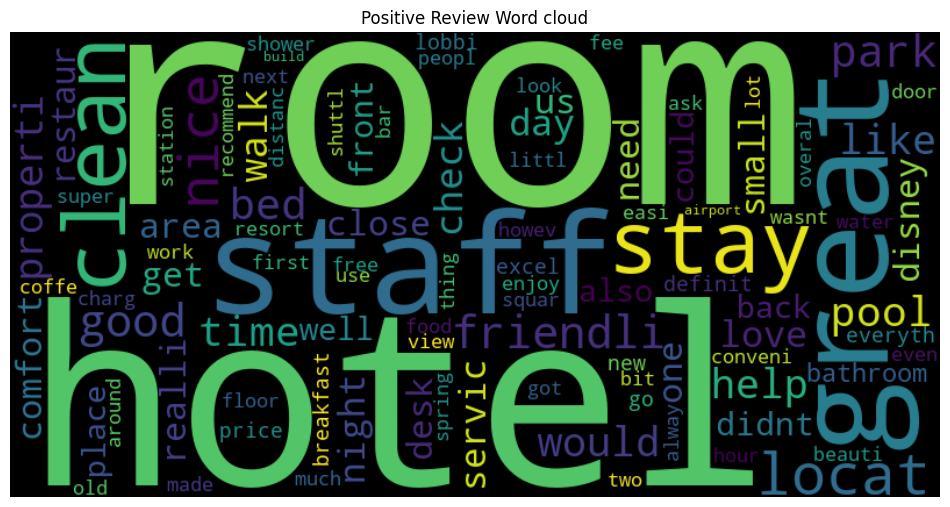

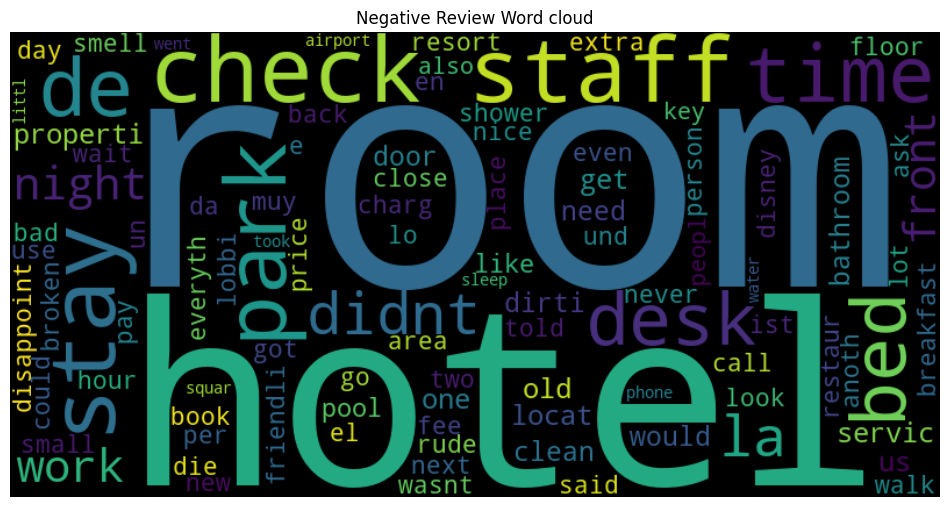

In [399]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(positive_freq_dist)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Review Word cloud")
plt.axis("off")
plt.show()

# Generate word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(negative_freq_dist)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Review Word cloud")
plt.axis("off")
plt.show()
